In [2]:
from IPython.display import Markdown

In [3]:
Markdown("""
Data source: yfinance\n
- BBCA (12/17/2020 - 15/12/2023)\n
- BBNI (12/17/2020 - 15/12/2023)\n
- ADRO (12/17/2020 - 15/12/2023)\n
- INDY (12/17/2020 - 15/12/2023)\n
""")


Data source: yfinance

- BBCA (12/17/2020 - 15/12/2023)

- BBNI (12/17/2020 - 15/12/2023)

- ADRO (12/17/2020 - 15/12/2023)

- INDY (12/17/2020 - 15/12/2023)



# Import Library

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from IPython.display import Markdown
from datetime import datetime
import textwrap

# StandardScaler and IsolationForest for detect outlier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# LSTM for forecasting
from keras.models import Sequential
from keras.layers import Dense, LSTM

# yfinance for crawling data
import yfinance as yf

sns.set_theme(style="whitegrid")

In [5]:
# defining wrap_labels for wrapping a few of labels that overidding the chart
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [6]:
# creat a few of lists that contains stock code, list, and moving average values
stock_list = ['BBCA', 'BBNI', 'BBRI', 'BMRI']
stock_code = ['BBCA', 'BBNI', 'BBRI', 'BMRI']
stock_ma = ['bbca_ma', 'bbni_ma', 'adro_ma', 'indy_ma']
com_list = []

# read data from local dir
for x, y, z in zip(stock_list, stock_code, stock_ma):
    globals()[x] = pd.read_csv(f'Data\{y}.JK.csv', encoding='utf-8')
    globals()[x]['Date'] = pd.to_datetime(globals()[x]['Date'])
    globals()[x]['Volume'] = globals()[x]['Volume'].astype(int)
    globals()[z] = globals()[x]
    globals()[z] =  globals()[z].set_index('Date')
    com_list.append(globals()[z])
             #Data\BBNI.JK.csv
df = pd.concat(com_list, axis=0)

BBCA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-17,6965.0,7000.0,6820.0,6935.0,6525.082520,91920000
1,2020-12-18,6935.0,6935.0,6755.0,6800.0,6398.062500,147238500
2,2020-12-21,6890.0,6890.0,6800.0,6830.0,6426.289551,93692500
3,2020-12-22,6740.0,6820.0,6710.0,6715.0,6318.087402,61790500
4,2020-12-23,6905.0,6905.0,6620.0,6725.0,6327.495605,76948000


In [7]:
BBCA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02
mean,7843.668033,7910.471311,7777.752732,7843.128415,7617.969949,8.437368e+07
std,986.644555,992.816547,991.387108,993.429327,1085.334475,5.408238e+07
min,6000.000000,6010.000000,5905.000000,5960.000000,5686.321289,1.065390e+07
25%,7050.000000,7097.500000,6973.750000,7018.750000,6638.622924,5.620330e+07
50%,7850.000000,7937.500000,7800.000000,7900.000000,7586.462891,7.339140e+07
75%,8775.000000,8850.000000,8725.000000,8775.000000,8650.384766,9.899895e+07
max,9425.000000,9450.000000,9375.000000,9400.000000,9355.363281,7.228279e+08


# Exploratory Data Analysis

In [8]:
chart = f'Open Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2023'

Markdown("""
### {title}
""".format(title=chart))


### Open Price BBCA, BBNI, BBRI, and BMRI 2020-2023


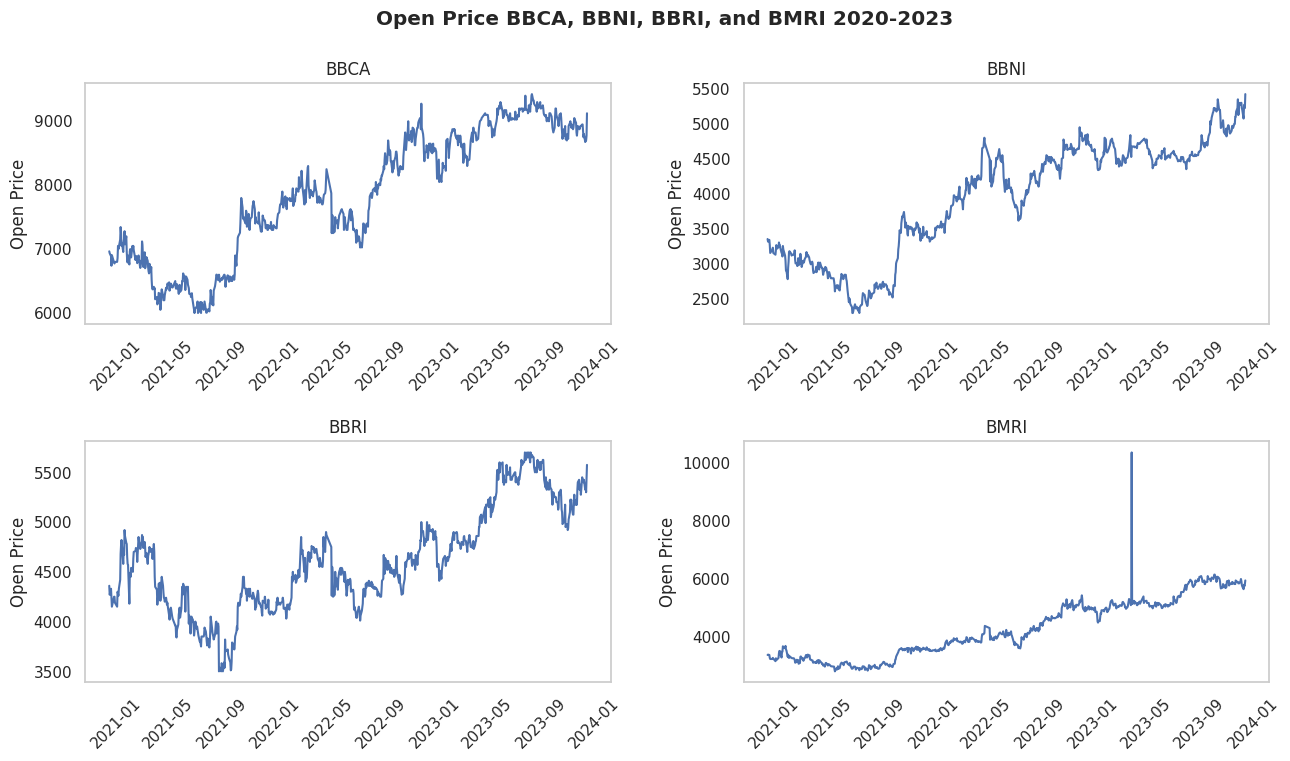

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Open' price
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Open',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Open Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [10]:
chart = f'Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Adj Close Price BBCA, BBNI, BBRI, and BMRI 2020-2022


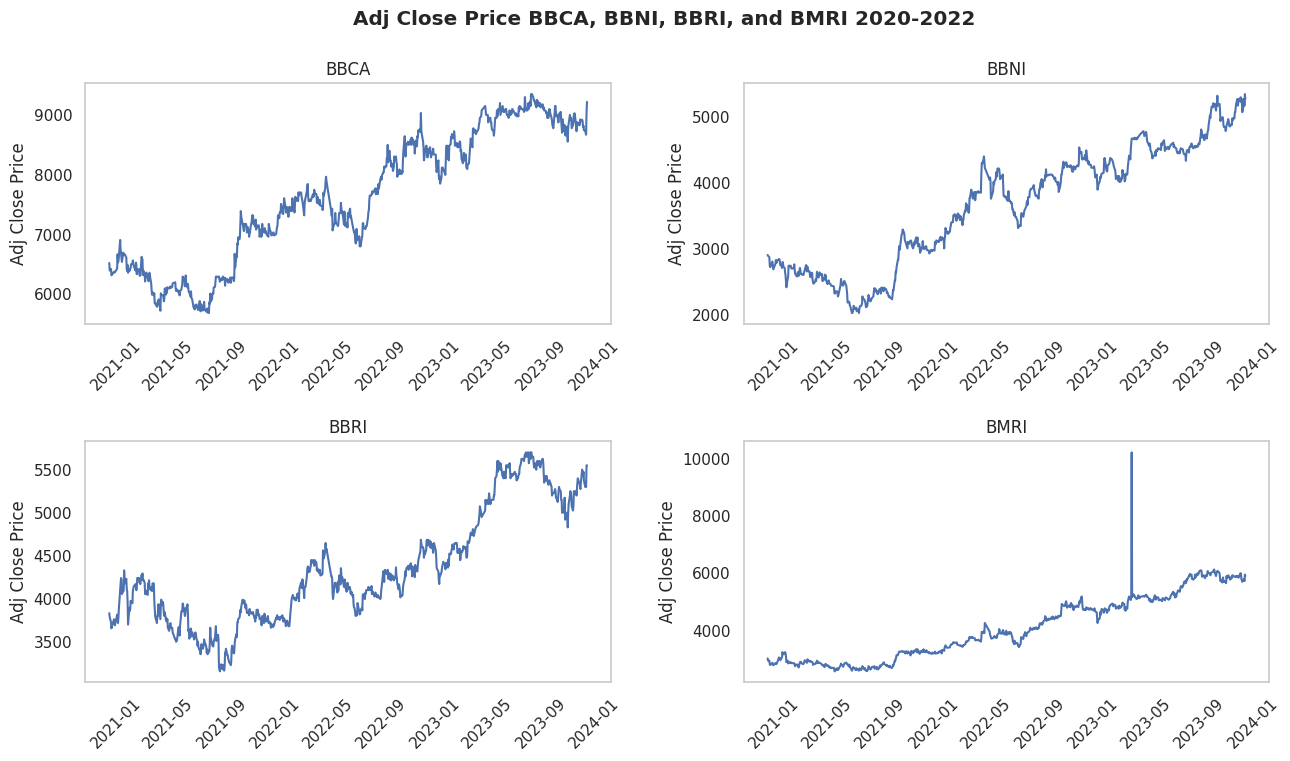

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Adj Close' price
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Adj Close',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Adj Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [12]:
chart = f'Open and Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Open and Adj Close Price BBCA, BBNI, BBRI, and BMRI 2020-2022


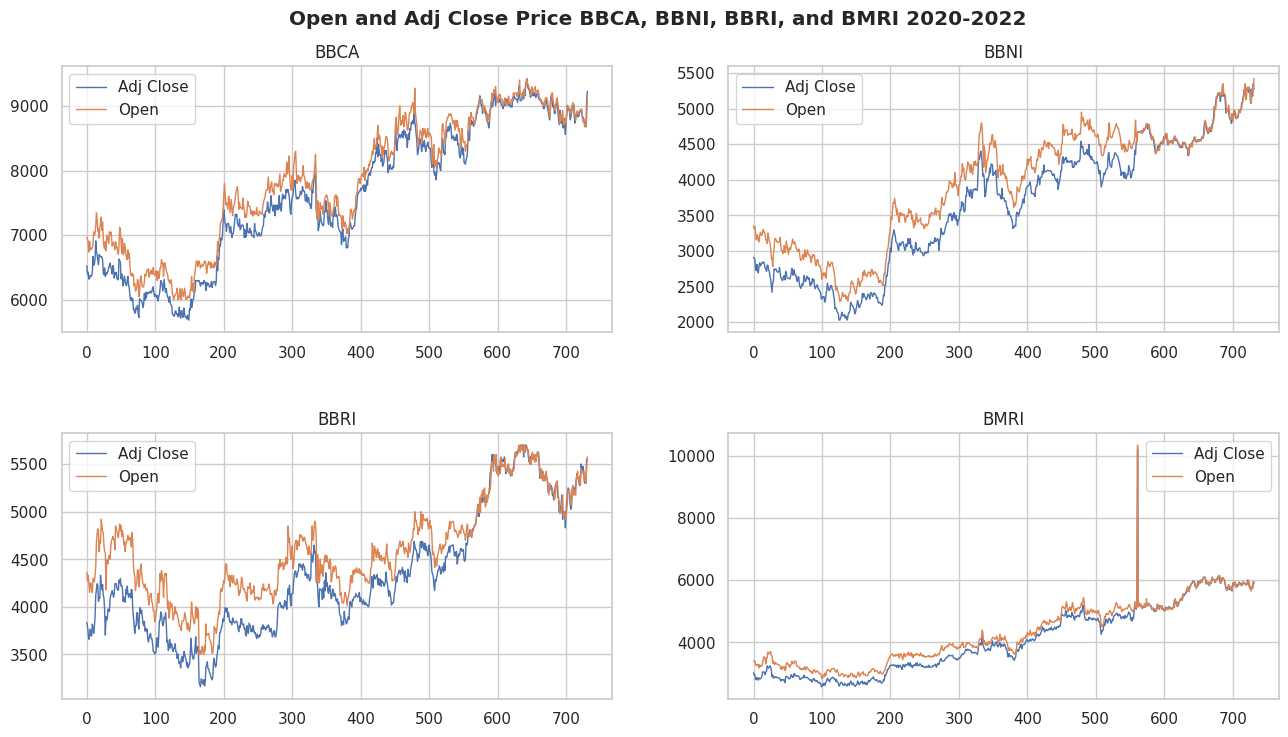

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Open' and 'Adj Close' price
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'Open']].plot(ax=ax, linewidth=1)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [15]:
chart = f'Volume {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2023'

Markdown("""
### {title}
""".format(title=chart))


### Volume BBCA, BBNI, BBRI, and BMRI 2020-2023


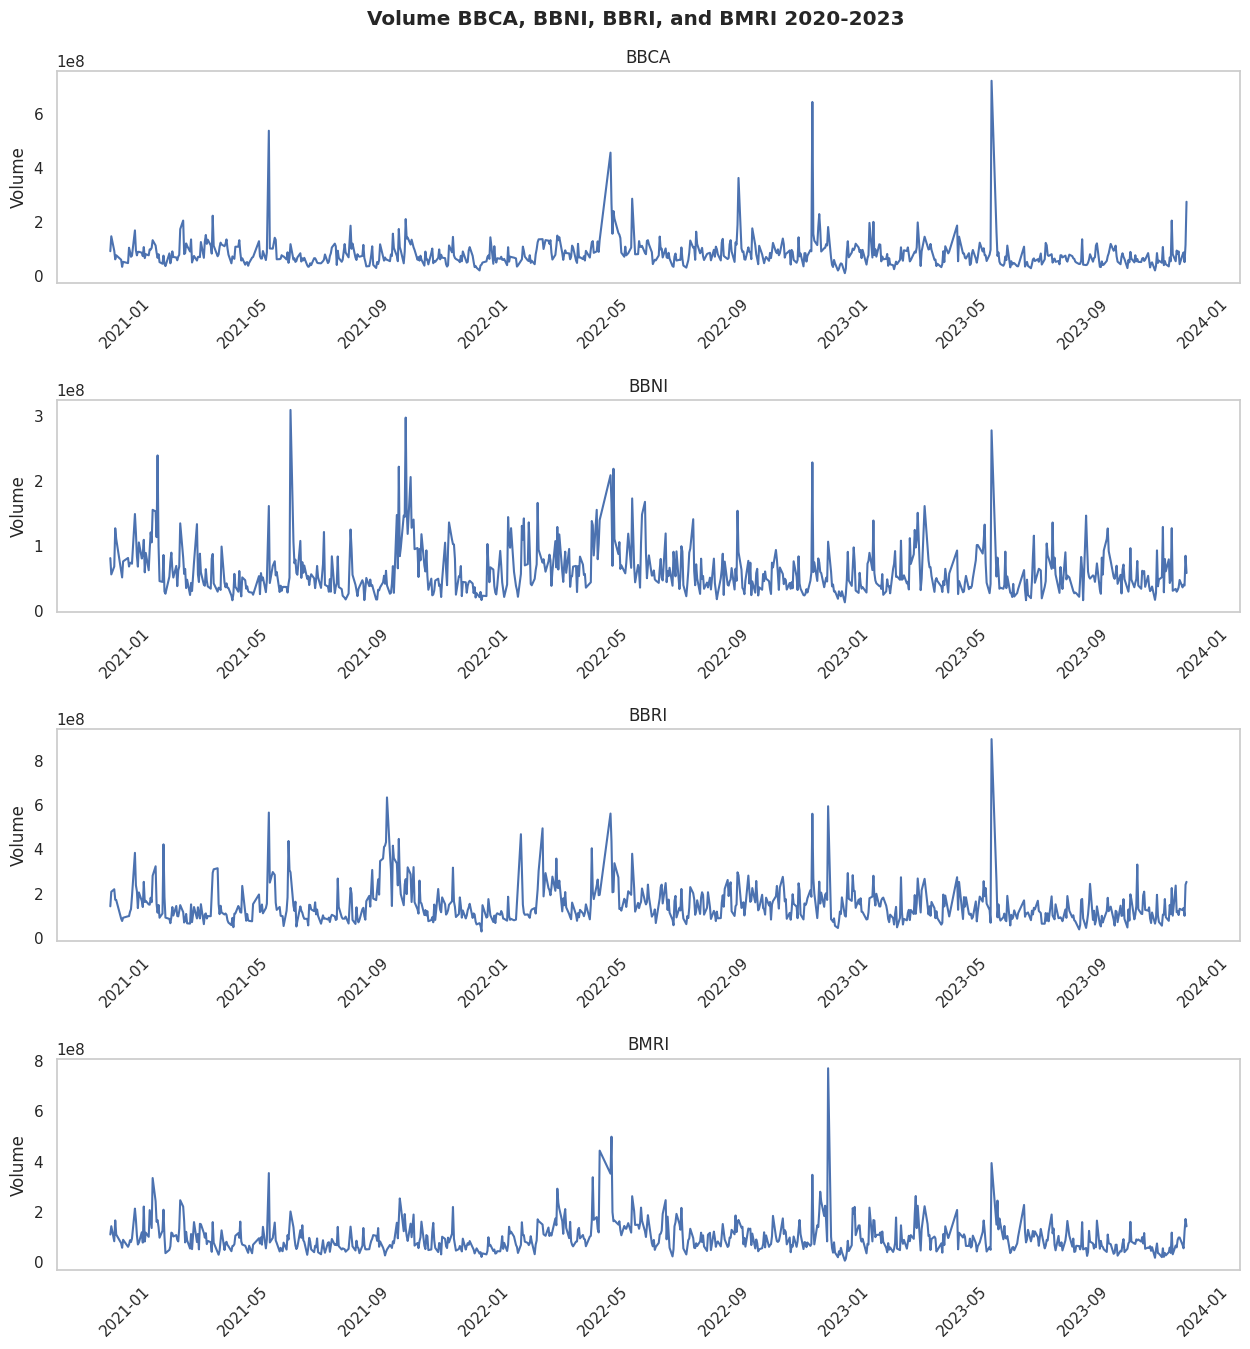

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(14, 14))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Volume'
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Volume',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [17]:
chart = 'Distribution of Adj Close Price 2020-2023'

Markdown("""
### {title}
""".format(title=chart))


### Distribution of Adj Close Price 2020-2023


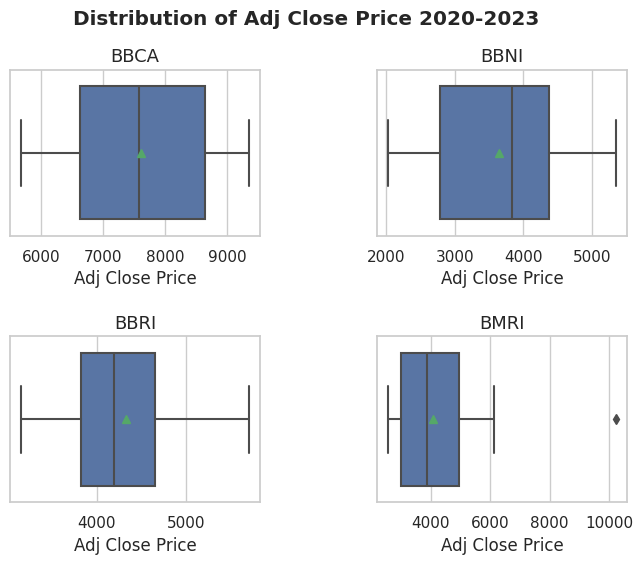

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')
# BBCA', 'BBNI', 'BBRI', 'BMRI'
g_stock = ['g_bbca', 'g_bbni', 'g_bbri', 'g_bmri']

# plotting the subplot boxplot based on value of 'Open' price
for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Adj Close', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

In [20]:
chart = 'Distribution of Volume 2020-2023'

Markdown("""
### {title}
""".format(title=chart))


### Distribution of Volume 2020-2023


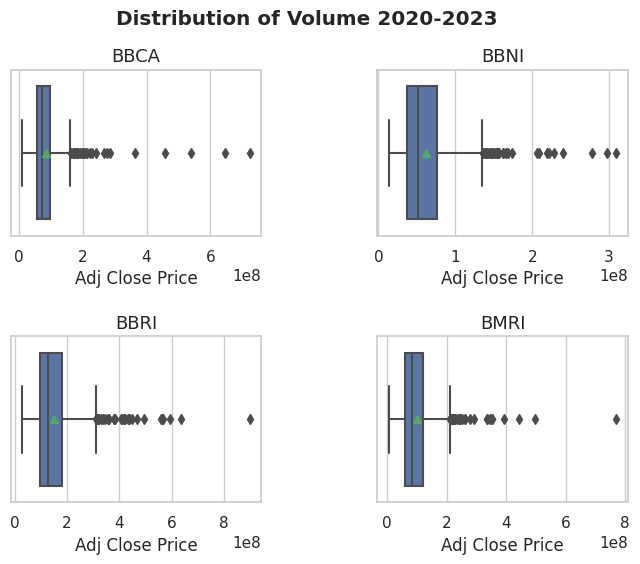

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')
# BBCA', 'BBNI', 'BBRI', 'BMRI'
g_stock = ['g_bbca', 'g_bbni', 'g_bbri', 'g_bmri']

# plotting the subplot boxplot based on value of 'Volume' price
for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Volume', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

In [22]:
chart = 'Average Adj Close Price Per Month'

Markdown("""
### {title}
""".format(title=chart))


### Average Adj Close Price Per Month


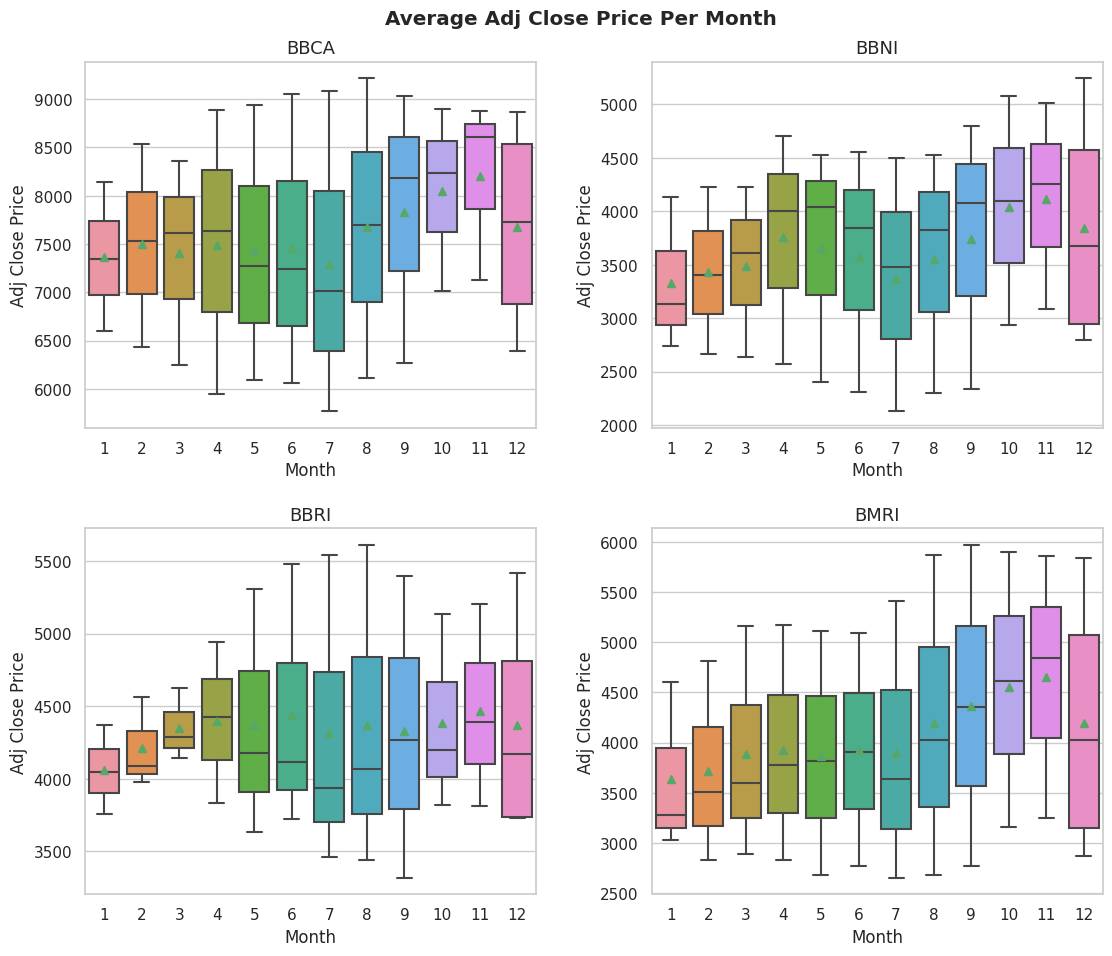

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

#BBCA', 'BBNI', 'BBRI', 'BMRI'
stock_resample = ['bbca_sample', 'bbni_sample', 'bbri_sample', 'bmri_sample']

# resampling data to get the average value per month
for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot boxplot based on average value of 'Adj Close Price' per month
for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Adj Close",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')

plt.show()

In [24]:
chart = 'Average Volume Per Month'

Markdown("""
### {title}
""".format(title=chart))


### Average Volume Per Month


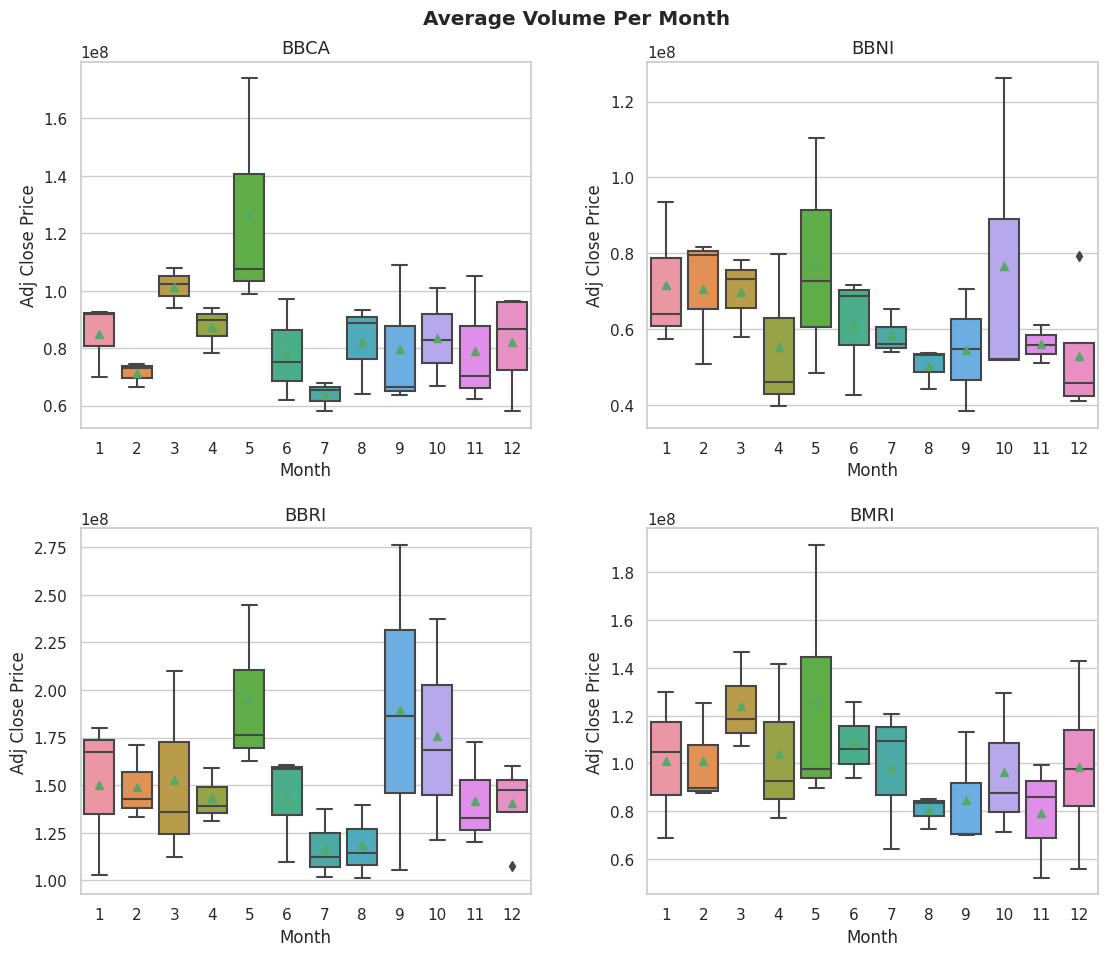

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot boxplot based on value of 'Volume' price
for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Volume",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')

plt.show()

In [26]:
chart = 'Correlation of Month and Year Based on Average Closing Price'

Markdown("""
### {title}
""".format(title=chart))


### Correlation of Month and Year Based on Average Closing Price


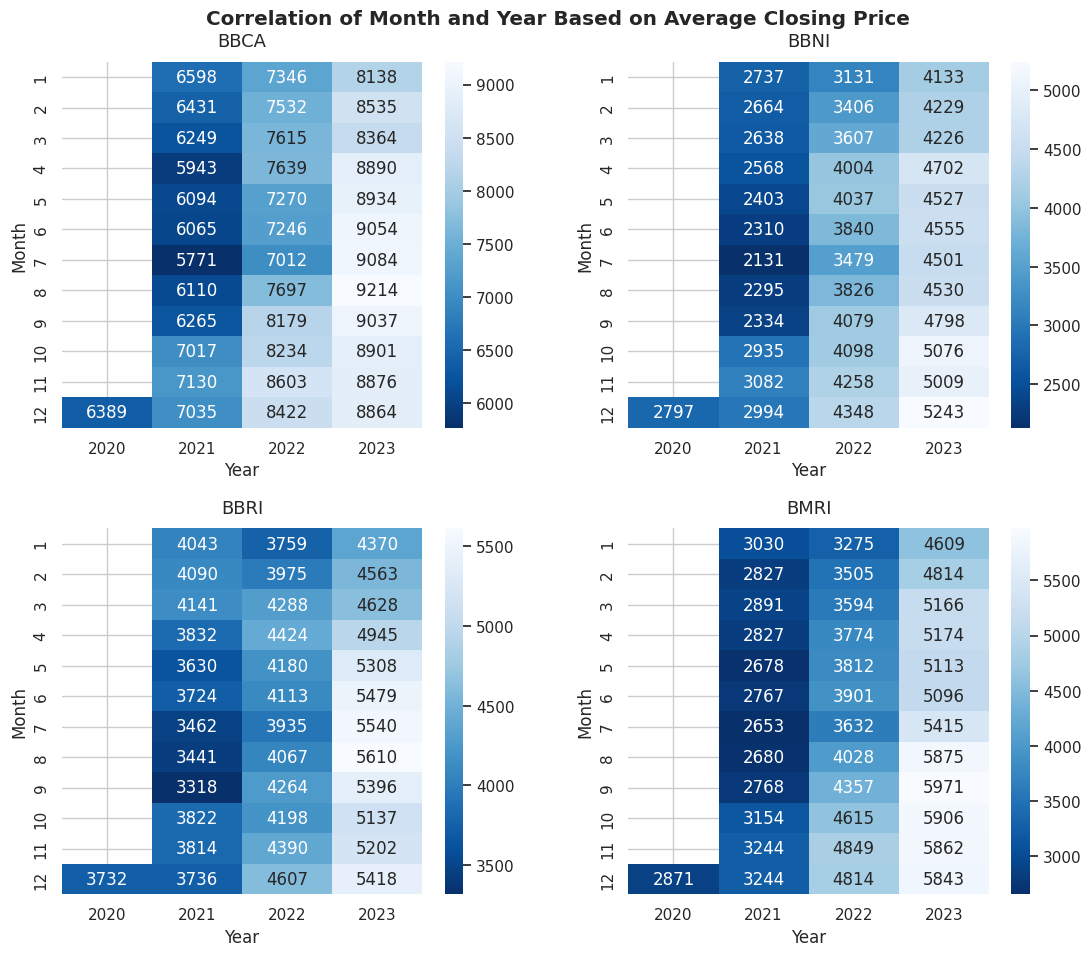

In [28]:
# BBCA', 'BBNI', 'BBRI', 'BMRI'
stock_pivot =['bbca_pivot', 'bbni_pivot', 'bbri_pivot', 'bmri_pivot']

# pivot data with 'Month'(Bulan) as index, 'Year'(Tahun) as columns, and 'Adj Close' as values
for x, y in zip(stock_pivot, stock_resample):
    globals()[y]["Bulan"] = globals()[y].index.month
    globals()[y]["Tahun"] = globals()[y].index.year
    globals()[x] = globals()[y].pivot(index="Bulan", columns="Tahun", values="Adj Close")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot heatmap based on value of average 'Close' price to see correlation between Month, Year, and Close Price
for x, y, z, ax in zip(stock_pivot, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(data=globals()[x], annot=True, fmt=".0f", cmap = 'Blues_r', ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    y.set_xlabel('Year', fontsize = 12)
    y.set_ylabel('Month')

plt.show()

Based on the chart above which shows the correlation between Month, Year, dan Close Price it was found that each stocks has turning point at the end of 2021 between October and December

In [29]:
# BBCA', 'BBNI', 'BBRI', 'BMRI'
stocks_code = ['BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK']

# (12/17/2020 - 15/12/2023)
closing_df = yf.download(stocks_code, '2020-12-17' , '2023-12-15')['Adj Close']

closing_df.rename(columns = {'BBCA.JK':'BBCA', 'BBNI.JK':'BBNI', 'BBRI.JK':'BBRI', 'BMRI.JK':'BMRI'}, inplace = True)

# resampling data with percentage of change
stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%%**********************]  4 of 4 completed


,BBCA,BBNI,BBRI,BMRI
Date,,,,
2020-12-17,NaN,NaN,NaN,NaN
2020-12-18,-0.019466,-0.003745,-0.011547,-0.025455
2020-12-21,0.004412,-0.007519,-0.016355,0.000000
2020-12-22,-0.016837,-0.045455,-0.019002,-0.044776
2020-12-23,0.001489,-0.007937,0.007264,-0.007813


In [30]:
chart = 'Stocks Correlation Based on Percentage Change of Closing Price'

Markdown("""
### {title}
""".format(title=chart))


### Stocks Correlation Based on Percentage Change of Closing Price


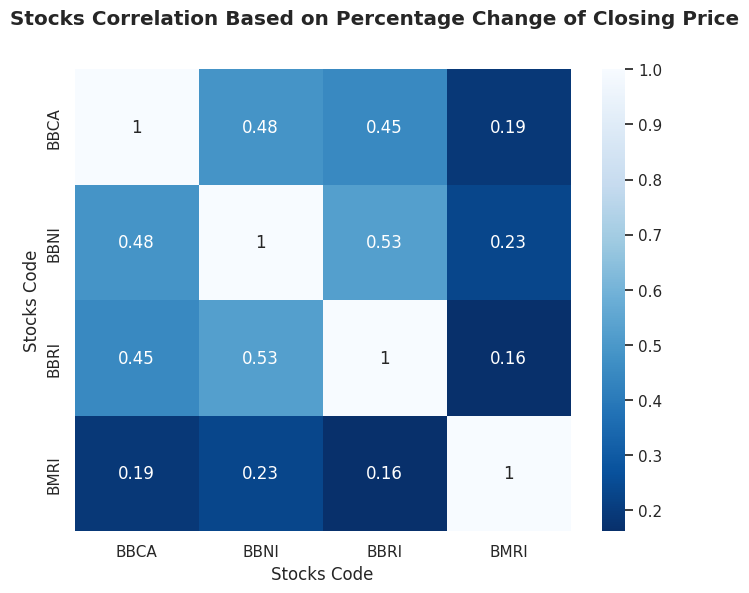

In [31]:
plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart}', fontweight='bold')

# plotting heatmap for shows percentage change of 'Close' price
g = sns.heatmap(stock_rets.corr(), annot=True, cmap = 'Blues_r')
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

In [32]:
chart = f'Moving Averages of {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2023'

Markdown("""
### {title}
""".format(title=chart))


### Moving Averages of BBCA, BBNI, BBRI, and BMRI 2020-2023


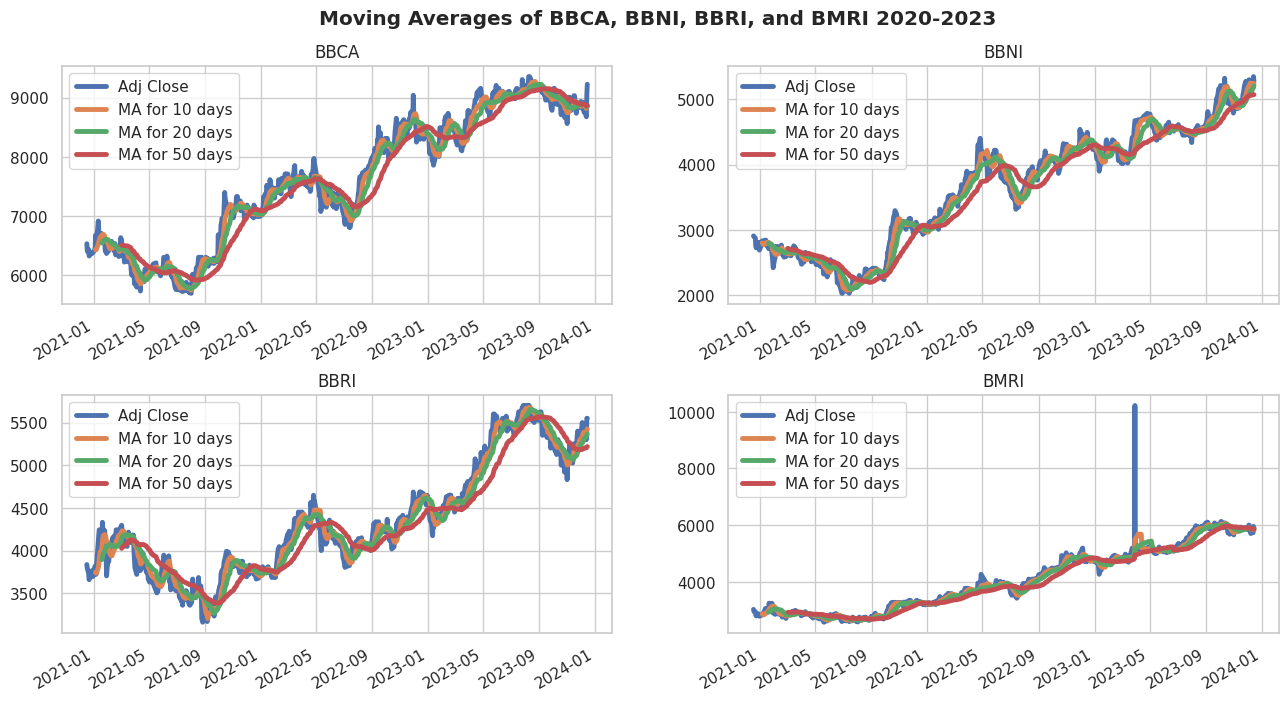

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

# creat a list for ma range
# ma refers to moving averages
ma_day = [10, 20, 50]

# resampling data with rolling data as average of ma range days
for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# plotting the subplot lineplot based on value of 'Moving Averages'
for x, y, ax in zip(stock_ma, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [34]:
chart = f'Outlier Detection {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
### {title}
""".format(title=chart))


### Outlier Detection BBCA, BBNI, BBRI, and BMRI 2020-2022


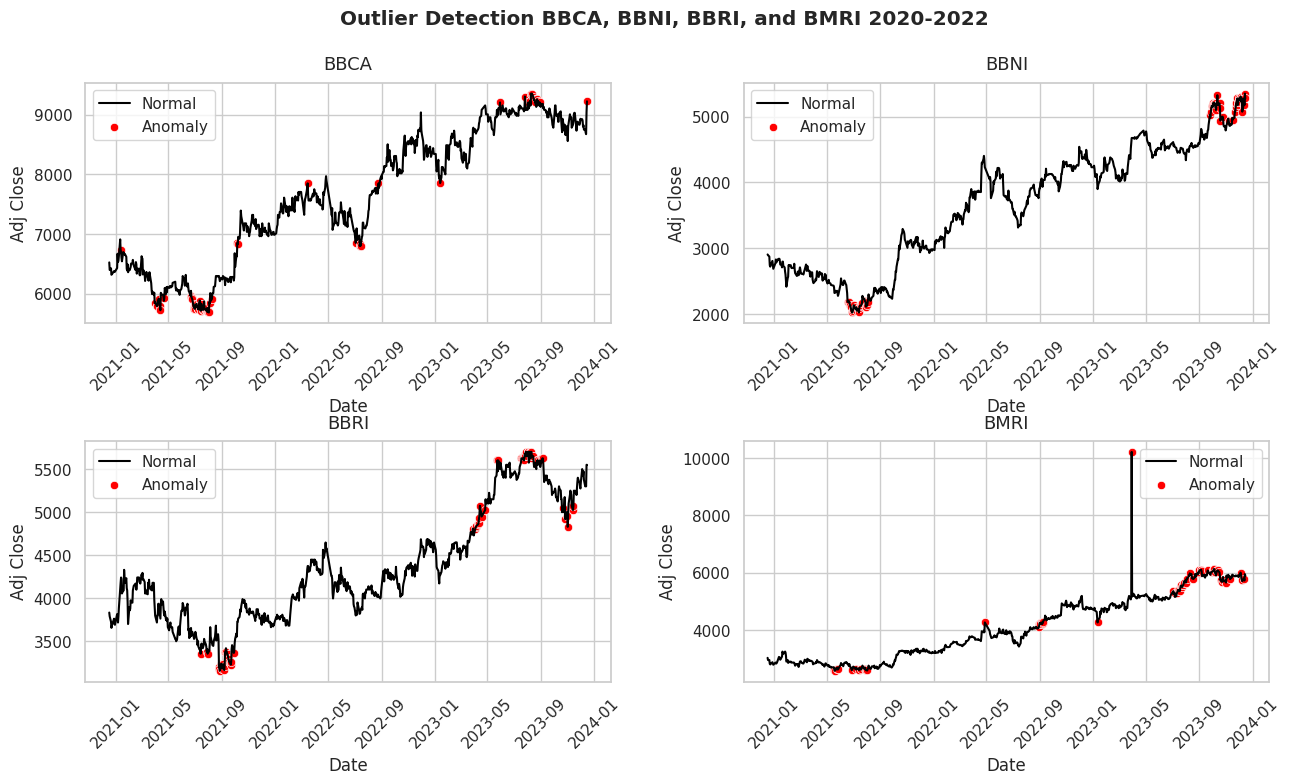

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# prediction of outlier(anomaly) using IsolationForest
for x in stock_ma:
    outliers_fraction = float(.09)
    scaler = StandardScaler()
    globals()[x]['Adj_Close'] = globals()[x]['Adj Close']
    np_scaled = scaler.fit_transform(globals()[x].Adj_Close.values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    globals()[x]['anomaly'] = model.predict(data)

# plotting the subplots lineplot of outlier values
for x, y, ax in zip(stock_ma, stock_code, axes.flatten()):
    a = globals()[x].loc[globals()[x]['anomaly'] == -1, ['Adj Close']]
    g = sns.lineplot(data=globals()[x], x="Date", y='Adj Close', color='black', label = 'Normal', ax=ax)
    g.tick_params(axis='x', rotation=45)
    g.set_title(y, fontweight="normal", size=13, y=1.02)
    g2= sns.scatterplot(data=a,x=a.index,y=a['Adj Close'], color='red', label = 'Anomaly', ax=ax)

plt.show()

# Forecasting

In [36]:
chart = f'{stock_code[0]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### BBCA Forecasting


In [37]:
# create a new dataframe with only 'Adj Close' column
data = bbca_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.22860497, 0.19398557, 0.20167888, 0.1721883 , 0.17475252,
       0.18885688, 0.18501016, 0.18629227, 0.20296111, 0.26835332,
       0.23116945, 0.2362984 , 0.25809594, 0.3337458 , 0.28630414,
       0.27604663, 0.25040264, 0.23373393, 0.27604663, 0.26963543,
       0.26963543, 0.26450687, 0.26578898, 0.25424922, 0.1991144 ,
       0.19142123, 0.21962969, 0.18372792, 0.1991144 , 0.19398557,
       0.20039664, 0.20808967, 0.22347628, 0.22475838, 0.24014486,
       0.22475838, 0.21450074, 0.19398557, 0.22988721, 0.21962969,
       0.17731686, 0.20039664, 0.19142123, 0.20039664, 0.17475252,
       0.16962369, 0.17090593, 0.2568137 , 0.2491204 , 0.24527381,
       0.17347028, 0.19398557, 0.17347028, 0.1439797 , 0.16962369,
       0.18501016, 0.15936604, 0.14910866, 0.14526194, 0.16962369])]
[0.18372792420196404]

[array([0.22860497, 0.19398557, 0.20167888, 0.1721883 , 0.17475252,
       0.18885688, 0.18501016, 0.18629227, 0.20296111, 0.26835332,
       0.23116945, 0.2362984 , 0.25

In [38]:
# create the testing dataset
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 15ms/step


136.68400144781185

Based on the rmse value above, it was found that the prediction results have relatively high accuracy

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [42]:
chart = f'{stock_code[2]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### BBRI Forecasting Result


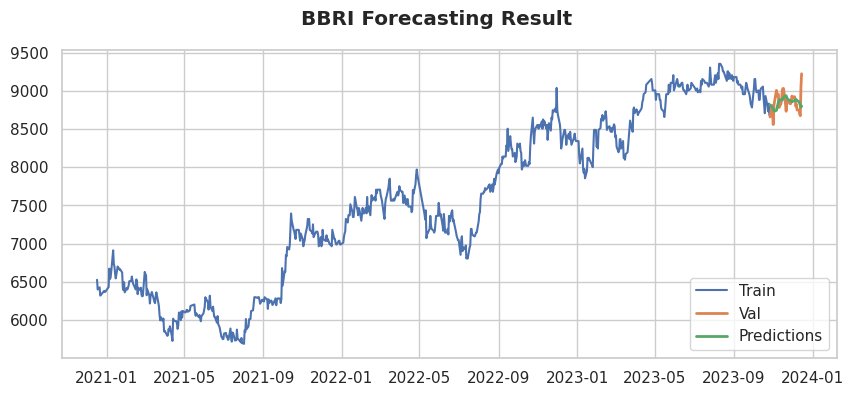

In [43]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [44]:
chart = f'{stock_code[1]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### BBNI Forecasting


In [45]:
# create a new dataframe with only 'Adj Close' column
data = bbni_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.26494852, 0.26167611, 0.25513122, 0.21586193, 0.20931711,
       0.23549661, 0.21586193, 0.19949981, 0.22567923, 0.24204151,
       0.22895172, 0.2322242 , 0.2387691 , 0.24531384, 0.24204151,
       0.24531384, 0.23549661, 0.21913441, 0.21586193, 0.2060447 ,
       0.2322242 , 0.2322242 , 0.21258952, 0.2060447 , 0.18641009,
       0.17332038, 0.14714081, 0.11768889, 0.15695818, 0.163503  ,
       0.21586193, 0.21258952, 0.21586193, 0.21586193, 0.2060447 ,
       0.20277229, 0.20277229, 0.2060447 , 0.2224069 , 0.1962274 ,
       0.17986513, 0.17659279, 0.16677549, 0.1700479 , 0.18641009,
       0.18641009, 0.1700479 , 0.2060447 , 0.1962274 , 0.17986513,
       0.17659279, 0.17659279, 0.17659279, 0.17332038, 0.18313761,
       0.1962274 , 0.21913441, 0.2060447 , 0.1896825 , 0.21258952])]
[0.1962273974326525]

[array([0.26494852, 0.26167611, 0.25513122, 0.21586193, 0.20931711,
       0.23549661, 0.21586193, 0.19949981, 0.22567923, 0.24204151,
       0.22895172, 0.2322242 , 0.238

In [46]:
# create the testing dataset
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 22ms/step


151.72838972743813

Based on the rmse value above, it was found that the prediction results have relatively high accuracy

In [47]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [52]:
chart = f'{stock_code[0]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### BBCA Forecasting Result


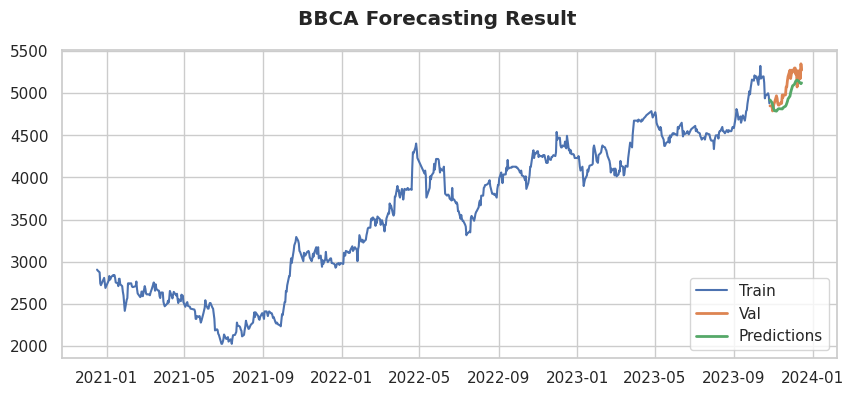

In [53]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [54]:
chart = f'{stock_code[2]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### BBRI Forecasting


In [51]:
# create a new dataframe with only 'Adj Close' column
data = adro_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.26594583, 0.2485133 , 0.2241078 , 0.19621571, 0.20667527,
       0.23805394, 0.21364824, 0.21016176, 0.25897295, 0.24502701,
       0.22062131, 0.2485133 , 0.28686514, 0.37751427, 0.40191977,
       0.42632547, 0.41935249, 0.35310877, 0.36705481, 0.36705481,
       0.46119072, 0.42632547, 0.40191977, 0.42283908, 0.37751427,
       0.36705481, 0.31475712, 0.21364824, 0.29035153, 0.27640558,
       0.28337846, 0.32173019, 0.31475712, 0.31127073, 0.36705481,
       0.37751427, 0.38797402, 0.39843357, 0.38448763, 0.3705413 ,
       0.38448763, 0.42632547, 0.42632547, 0.42632547, 0.40540636,
       0.40540636, 0.39843357, 0.44027161, 0.42981205, 0.44724477,
       0.4158661 , 0.41935249, 0.40540636, 0.35310877, 0.3705413 ,
       0.35310877, 0.34962238, 0.40191977, 0.38448763, 0.4158661 ])]
[0.3844876279607057]

[array([0.26594583, 0.2485133 , 0.2241078 , 0.19621571, 0.20667527,
       0.23805394, 0.21364824, 0.21016176, 0.25897295, 0.24502701,
       0.22062131, 0.2485133 , 0.286

In [55]:
# create the testing dataset
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 15ms/step


146.7630157717538

Based on the rmse value above, it was found that the prediction results have relatively high accuracy

In [56]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [57]:
chart = f'{stock_code[2]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### BBRI Forecasting Result


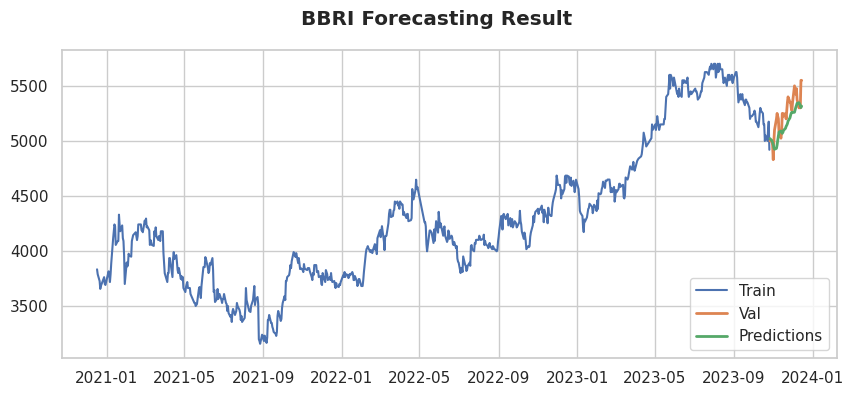

In [58]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [59]:
chart = f'{stock_code[3]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### BMRI Forecasting


In [60]:
# create a new dataframe with only 'Adj Close' column
data = indy_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.05917104, 0.04913901, 0.04913901, 0.03194134, 0.02907505,
       0.03910705, 0.03337447, 0.02764189, 0.03767389, 0.03337447,
       0.03337447, 0.03624076, 0.04054018, 0.05773788, 0.06347046,
       0.06203733, 0.05773788, 0.05057214, 0.06203733, 0.06490362,
       0.08783386, 0.08066816, 0.07780187, 0.08353445, 0.08783386,
       0.08353445, 0.06920303, 0.04197334, 0.04913901, 0.03624076,
       0.03767389, 0.04197334, 0.04054018, 0.04197334, 0.03767389,
       0.03767389, 0.03767389, 0.03767389, 0.03624076, 0.02907505,
       0.02334248, 0.03050818, 0.03050818, 0.02764189, 0.03050818,
       0.02477564, 0.0176099 , 0.04197334, 0.04340647, 0.04340647,
       0.04054018, 0.03624076, 0.03337447, 0.03337447, 0.03767389,
       0.05057214, 0.04627276, 0.04054018, 0.03910705, 0.05487162])]
[0.053438461204478205]

[array([0.05917104, 0.04913901, 0.04913901, 0.03194134, 0.02907505,
       0.03910705, 0.03337447, 0.02764189, 0.03767389, 0.03337447,
       0.03337447, 0.03624076, 0.0

In [61]:
# create the testing dataset
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 19ms/step


90.96186760374789

Based on the rmse value above, it was found that the prediction results have relatively high accuracy

In [62]:
# assign result of forecasting into a new dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [63]:
chart = f'{stock_code[3]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### BMRI Forecasting Result


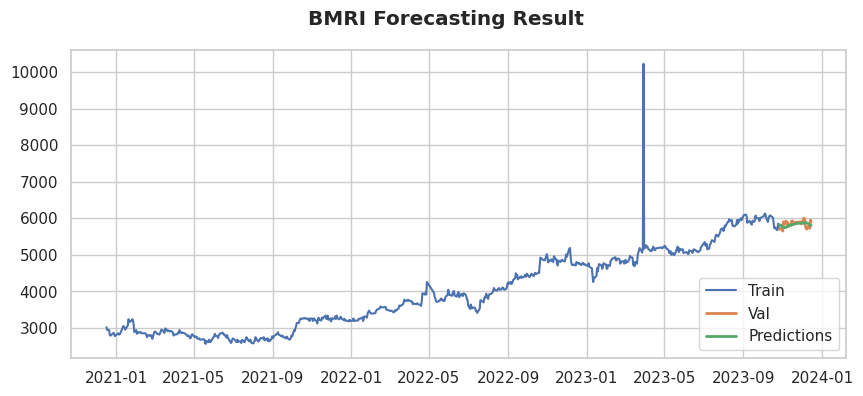

In [64]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()